In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from preproseccing import get_data, create_ts_train_test_data, get_data_diff, get_data_division
from calculate_metrics import get_metrics, construct_ts, get_metrics_from_df
from models import get_model_fc

/Users/chernovandrey/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/chernovandrey/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/chernovandrey/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/chernovandrey/anaconda3/lib/python3.7/site-packages

In [3]:
data = get_data(return_only_labels=False)

In [4]:
data.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Country', 'Lat', 'Long', 'Date',
       'Confirmed', 'Deaths', 'Recovered', 'C1_School closing',
       'C2_Workplace closing', 'C3_Cancel public events',
       'C4_Restrictions on gatherings', 'C5_Close public transport',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls', 'E1_Income support',
       'E2_Debt/contract relief', 'E3_Fiscal measures',
       'E4_International support', 'H1_Public information campaigns',
       'H2_Testing policy', 'H3_Contact tracing',
       'H4_Emergency investment in healthcare', 'H5_Investment in vaccines',
       'M1_Wildcard', 'StringencyIndex', 'StringencyLegacyIndex',
       'GovernmentResponseIndex', 'ContainmentHealthIndex',
       'EconomicSupportIndex', 'census_fips_code',
       'retail_and_recreation_percent_change_from_baseline',
       'grocery_and_pharmacy_percent_change_from_baseline',
       'parks_percent_change_from_baseline',

In [5]:
C_policies = ['C1_School closing',
       'C2_Workplace closing', 'C3_Cancel public events',
       'C4_Restrictions on gatherings', 'C5_Close public transport',
       'C6_Stay at home requirements', 'C7_Restrictions on internal movement',
       'C8_International travel controls']

In [6]:
data = data[['Date', 'Country'] + C_policies + ['Confirmed']]

In [7]:
data.describe()

,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,Confirmed
count,13552.000000,13544.000000,13540.000000,13549.000000,13551.000000,13548.000000,13542.000000,13534.000000,1.561600e+04
mean,2.627730,1.947061,1.825111,2.991069,0.984651,1.417626,1.384729,3.358505,2.652445e+04
std,0.830872,0.967806,0.491441,1.351221,0.824299,0.954840,0.817682,0.998060,1.249976e+05
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000e+01
25%,3.000000,2.000000,2.000000,3.000000,0.000000,1.000000,1.000000,3.000000,3.240000e+02
50%,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,2.000000,4.000000,1.445500e+03
75%,3.000000,3.000000,2.000000,4.000000,2.000000,2.000000,2.000000,4.000000,9.440750e+03
max,3.000000,3.000000,2.000000,4.000000,2.000000,3.000000,2.000000,4.000000,2.422299e+06


In [8]:
data.corr() 

,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,Confirmed
C1_School closing,1.000000,0.459508,0.544191,0.412942,0.365540,0.464417,0.453293,0.282092,0.054718
C2_Workplace closing,0.459508,1.000000,0.474147,0.478954,0.498818,0.582620,0.544019,0.190681,0.087112
C3_Cancel public events,0.544191,0.474147,1.000000,0.514490,0.356782,0.447042,0.502327,0.279359,0.059859
C4_Restrictions on gatherings,0.412942,0.478954,0.514490,1.000000,0.369855,0.450044,0.440019,0.249222,0.081593
C5_Close public transport,0.365540,0.498818,0.356782,0.369855,1.000000,0.529393,0.564322,0.241726,0.016610
C6_Stay at home requirements,0.464417,0.582620,0.447042,0.450044,0.529393,1.000000,0.658591,0.298521,0.067695
C7_Restrictions on internal movement,0.453293,0.544019,0.502327,0.440019,0.564322,0.658591,1.000000,0.305267,0.088917
C8_International travel controls,0.282092,0.190681,0.279359,0.249222,0.241726,0.298521,0.305267,1.000000,-0.058044
Confirmed,0.054718,0.087112,0.059859,0.081593,0.016610,0.067695,0.088917,-0.058044,1.000000


In [9]:
# C8 - сам по себе
# C4 - сам по себе
# C1,C3
# C2,C5,C6,C7

In [10]:
data = data.loc[data['Country'] == 'Germany']

In [11]:
data.head()

,Date,Country,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,Confirmed
5443,02/26/2020,Germany,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,27
5444,02/27/2020,Germany,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46
5445,02/28/2020,Germany,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,48
5446,02/29/2020,Germany,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,79
5447,03/01/2020,Germany,2.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,130


In [12]:
data.shape

(121, 11)

In [13]:
data.describe()

,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,Confirmed
count,121.000000,121.000000,121.000000,121.000000,121.0,121.000000,121.000000,121.000000,121.000000
mean,2.471074,1.198347,1.867769,3.041322,0.0,0.859504,1.016529,3.157025,121125.900826
std,0.501238,0.759603,0.407066,1.374753,0.0,0.942566,0.999862,1.087875,71993.843978
min,2.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,27.000000
25%,2.000000,1.000000,2.000000,3.000000,0.0,0.000000,0.000000,3.000000,50871.000000
50%,2.000000,1.000000,2.000000,4.000000,0.0,0.000000,2.000000,3.000000,157770.000000
75%,3.000000,2.000000,2.000000,4.000000,0.0,2.000000,2.000000,4.000000,181200.000000
max,3.000000,2.000000,2.000000,4.000000,0.0,2.000000,2.000000,4.000000,193371.000000


In [14]:
data.corr()

,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,Confirmed
C1_School closing,1.000000,-0.203676,0.307836,0.394786,NaN,0.776242,0.582935,0.581495,-0.085497
C2_Workplace closing,-0.203676,1.000000,0.516738,0.614532,NaN,-0.403041,-0.103102,0.405712,0.905399
C3_Cancel public events,0.307836,0.516738,1.000000,0.724623,NaN,0.276964,0.333007,0.724730,0.549593
C4_Restrictions on gatherings,0.394786,0.614532,0.724623,1.000000,NaN,0.403243,0.623940,0.876010,0.673647
C5_Close public transport,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C6_Stay at home requirements,0.776242,-0.403041,0.276964,0.403243,NaN,1.000000,0.736399,0.525566,-0.242086
C7_Restrictions on internal movement,0.582935,-0.103102,0.333007,0.623940,NaN,0.736399,1.000000,0.748397,0.025986
C8_International travel controls,0.581495,0.405712,0.724730,0.876010,NaN,0.525566,0.748397,1.000000,0.498836
Confirmed,-0.085497,0.905399,0.549593,0.673647,NaN,-0.242086,0.025986,0.498836,1.000000


In [15]:
data.columns

Index(['Date', 'Country', 'C1_School closing', 'C2_Workplace closing',
       'C3_Cancel public events', 'C4_Restrictions on gatherings',
       'C5_Close public transport', 'C6_Stay at home requirements',
       'C7_Restrictions on internal movement',
       'C8_International travel controls', 'Confirmed'],
      dtype='object')

In [16]:
data[data.columns[2:]] = data[data.columns[2:]].diff().iloc[1:]

In [17]:
data

,Date,Country,C1_School closing,C2_Workplace closing,C3_Cancel public events,C4_Restrictions on gatherings,C5_Close public transport,C6_Stay at home requirements,C7_Restrictions on internal movement,C8_International travel controls,Confirmed
5443,02/26/2020,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5444,02/27/2020,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,19.0
5445,02/28/2020,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0
5446,02/29/2020,Germany,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,31.0
5447,03/01/2020,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0
...,...,...,...,...,...,...,...,...,...,...,...
5559,06/21/2020,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,602.0
5560,06/22/2020,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0
5561,06/23/2020,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,712.0
5562,06/24/2020,Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,391.0


In [18]:
data = data.reset_index(drop=True)

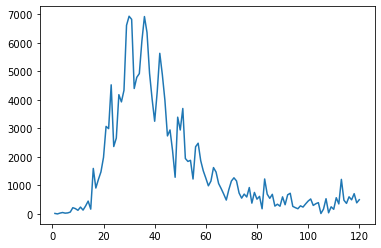

In [21]:
data['Confirmed'].plot()

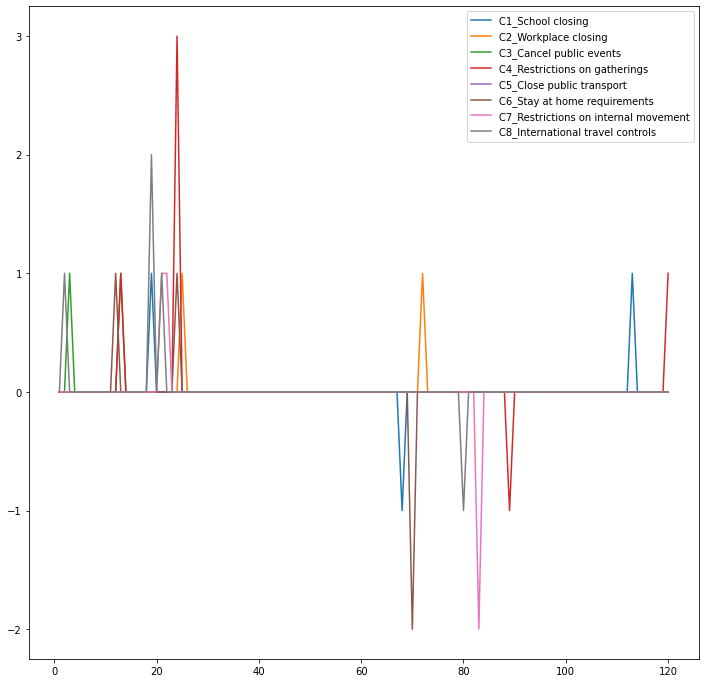

In [25]:
data[data.columns[2:-1]].plot(figsize=(12,12))